In [1]:
#############################################################################
### Търсене и извличане на информация. Приложение на дълбоко машинно обучение
### Стоян Михов
### Зимен семестър 2021/2022
#############################################################################
###
### Домашно задание 2  -- програма за извикване на обучението
###
#############################################################################

import nltk
from nltk.corpus import PlaintextCorpusReader
import numpy as np
import sys

import grads
import utils
import w2v_sgd
import sampling

In [2]:
#############################################################
#######   Зареждане на корпуса
#############################################################
startToken = '<START>'
endToken = '<END>'

corpus_root = '../../practice/JOURNALISM.BG/C-MassMedia'
myCorpus = PlaintextCorpusReader(corpus_root, '.*\.txt')

corpus = [ [startToken] + [w.lower() for w in sent] + [endToken] for sent in myCorpus.sents()]

windowSize = 3
negativesCount = 5
embDim = 50

words, word2ind, freqs = utils.extractDictionary(corpus, limit=20000)
data = utils.extractWordContextPairs(corpus, windowSize, word2ind)

del corpus

[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]


In [3]:
U0 = (np.random.rand(len(words), embDim) - 0.5) / embDim
V0 = (np.random.rand(len(words), embDim) - 0.5) / embDim
v0 = (np.random.rand(embDim) - 0.5) / embDim

seq = sampling.createSamplingSequence(freqs)
contextFunction = lambda c: sampling.sampleContext(c, seq, negativesCount)

if len(sys.argv)>1 and sys.argv[1] == 'cumulative':
    U,V,v = w2v_sgd.stochasticGradientDescend(data,np.copy(U0),np.copy(V0),np.copy(v0),contextFunction,grads.lossAndGradientCumulative)
else:
    U,V,v = w2v_sgd.stochasticGradientDescend(data,np.copy(U0),np.copy(V0),np.copy(v0),contextFunction,grads.lossAndGradientBatched)

Epoch: 0 Sample: 0 / 53735682 Loss: 4.158825869450769
Epoch: 0 Sample: 10000 / 53735682 Loss: 4.146111564211253
Epoch: 0 Sample: 20000 / 53735682 Loss: 3.8211443192717454
Epoch: 0 Sample: 30000 / 53735682 Loss: 3.2813517163432806
Epoch: 0 Sample: 40000 / 53735682 Loss: 2.9900938297872797
Epoch: 0 Sample: 50000 / 53735682 Loss: 2.7950921036328156
Epoch: 0 Sample: 60000 / 53735682 Loss: 2.684280124323597
Epoch: 0 Sample: 70000 / 53735682 Loss: 2.587923352246589
Epoch: 0 Sample: 80000 / 53735682 Loss: 2.521000487644519
Epoch: 0 Sample: 90000 / 53735682 Loss: 2.307184314064564
Epoch: 0 Sample: 100000 / 53735682 Loss: 2.283052527080101
Epoch: 0 Sample: 110000 / 53735682 Loss: 2.22440160737137
Epoch: 0 Sample: 120000 / 53735682 Loss: 2.124703141726674
Epoch: 0 Sample: 130000 / 53735682 Loss: 2.2029613247164366
Epoch: 0 Sample: 140000 / 53735682 Loss: 2.0877677602083162
Epoch: 0 Sample: 150000 / 53735682 Loss: 1.9601475742426895
Epoch: 0 Sample: 160000 / 53735682 Loss: 2.2415120305184537
Epoc

Epoch: 0 Sample: 1370000 / 53735682 Loss: 1.7249871452121504
Epoch: 0 Sample: 1380000 / 53735682 Loss: 1.654232446042238
Epoch: 0 Sample: 1390000 / 53735682 Loss: 1.7404626681960451
Epoch: 0 Sample: 1400000 / 53735682 Loss: 1.7154165105778905
Epoch: 0 Sample: 1410000 / 53735682 Loss: 1.7303343538511922
Epoch: 0 Sample: 1420000 / 53735682 Loss: 1.6824820921341637
Epoch: 0 Sample: 1430000 / 53735682 Loss: 1.7002664495875708
Epoch: 0 Sample: 1440000 / 53735682 Loss: 1.6577784448917225
Epoch: 0 Sample: 1450000 / 53735682 Loss: 1.7475141021563232
Epoch: 0 Sample: 1460000 / 53735682 Loss: 1.7681497936777393
Epoch: 0 Sample: 1470000 / 53735682 Loss: 1.7093678191830162
Epoch: 0 Sample: 1480000 / 53735682 Loss: 1.7934658975638884
Epoch: 0 Sample: 1490000 / 53735682 Loss: 1.7063329784204866
Epoch: 0 Sample: 1500000 / 53735682 Loss: 1.6813396145003052
Epoch: 0 Sample: 1510000 / 53735682 Loss: 1.6926801783722631
Epoch: 0 Sample: 1520000 / 53735682 Loss: 1.6252122994227847
Epoch: 0 Sample: 1530000 

Epoch: 0 Sample: 2720000 / 53735682 Loss: 1.705770697832211
Epoch: 0 Sample: 2730000 / 53735682 Loss: 1.5875241114990017
Epoch: 0 Sample: 2740000 / 53735682 Loss: 1.6084950147561274
Epoch: 0 Sample: 2750000 / 53735682 Loss: 1.6094802244695958
Epoch: 0 Sample: 2760000 / 53735682 Loss: 1.5853403238635722
Epoch: 0 Sample: 2770000 / 53735682 Loss: 1.651394727894308
Epoch: 0 Sample: 2780000 / 53735682 Loss: 1.695846008255355
Epoch: 0 Sample: 2790000 / 53735682 Loss: 1.6209787510207199
Epoch: 0 Sample: 2800000 / 53735682 Loss: 1.6532235246448872
Epoch: 0 Sample: 2810000 / 53735682 Loss: 1.5750131279049973
Epoch: 0 Sample: 2820000 / 53735682 Loss: 1.6347766449883812
Epoch: 0 Sample: 2830000 / 53735682 Loss: 1.6217586666298733
Epoch: 0 Sample: 2840000 / 53735682 Loss: 1.6659616533787207
Epoch: 0 Sample: 2850000 / 53735682 Loss: 1.7396528593386174
Epoch: 0 Sample: 2860000 / 53735682 Loss: 1.6606038703857176
Epoch: 0 Sample: 2870000 / 53735682 Loss: 1.581763644737397
Epoch: 0 Sample: 2880000 / 5

Epoch: 0 Sample: 4070000 / 53735682 Loss: 1.543395957626355
Epoch: 0 Sample: 4080000 / 53735682 Loss: 1.533213698755787
Epoch: 0 Sample: 4090000 / 53735682 Loss: 1.612226196869408
Epoch: 0 Sample: 4100000 / 53735682 Loss: 1.5651176535738318
Epoch: 0 Sample: 4110000 / 53735682 Loss: 1.5941482370334006
Epoch: 0 Sample: 4120000 / 53735682 Loss: 1.5616701835992768
Epoch: 0 Sample: 4130000 / 53735682 Loss: 1.4871996410252857
Epoch: 0 Sample: 4140000 / 53735682 Loss: 1.537045124798975
Epoch: 0 Sample: 4150000 / 53735682 Loss: 1.5928185049597818
Epoch: 0 Sample: 4160000 / 53735682 Loss: 1.5423253199056117
Epoch: 0 Sample: 4170000 / 53735682 Loss: 1.5970725698041914
Epoch: 0 Sample: 4180000 / 53735682 Loss: 1.5558288206252027
Epoch: 0 Sample: 4190000 / 53735682 Loss: 1.6770278392084257
Epoch: 0 Sample: 4200000 / 53735682 Loss: 1.5438015154186653
Epoch: 0 Sample: 4210000 / 53735682 Loss: 1.5082151357610232
Epoch: 0 Sample: 4220000 / 53735682 Loss: 1.452638202433522
Epoch: 0 Sample: 4230000 / 53

Epoch: 0 Sample: 5420000 / 53735682 Loss: 1.5323301295900156
Epoch: 0 Sample: 5430000 / 53735682 Loss: 1.5896626839101011
Epoch: 0 Sample: 5440000 / 53735682 Loss: 1.561784065000314
Epoch: 0 Sample: 5450000 / 53735682 Loss: 1.4861945367201814
Epoch: 0 Sample: 5460000 / 53735682 Loss: 1.507683036010505
Epoch: 0 Sample: 5470000 / 53735682 Loss: 1.5020599154842151
Epoch: 0 Sample: 5480000 / 53735682 Loss: 1.576074083090575
Epoch: 0 Sample: 5490000 / 53735682 Loss: 1.4917538965863626
Epoch: 0 Sample: 5500000 / 53735682 Loss: 1.4990005653713543
Epoch: 0 Sample: 5510000 / 53735682 Loss: 1.5583017034458535
Epoch: 0 Sample: 5520000 / 53735682 Loss: 1.5095594673136352
Epoch: 0 Sample: 5530000 / 53735682 Loss: 1.4898553399236865
Epoch: 0 Sample: 5540000 / 53735682 Loss: 1.5061577722777442
Epoch: 0 Sample: 5550000 / 53735682 Loss: 1.5534569940770488
Epoch: 0 Sample: 5560000 / 53735682 Loss: 1.520783586342151
Epoch: 0 Sample: 5570000 / 53735682 Loss: 1.6325475123988809
Epoch: 0 Sample: 5580000 / 5

Epoch: 0 Sample: 6770000 / 53735682 Loss: 1.4434295855520385
Epoch: 0 Sample: 6780000 / 53735682 Loss: 1.5711079464059117
Epoch: 0 Sample: 6790000 / 53735682 Loss: 1.559490452490696
Epoch: 0 Sample: 6800000 / 53735682 Loss: 1.376239351812631
Epoch: 0 Sample: 6810000 / 53735682 Loss: 1.4699988923886589
Epoch: 0 Sample: 6820000 / 53735682 Loss: 1.4711835156657451
Epoch: 0 Sample: 6830000 / 53735682 Loss: 1.4568270881621328
Epoch: 0 Sample: 6840000 / 53735682 Loss: 1.4977121486020732
Epoch: 0 Sample: 6850000 / 53735682 Loss: 1.5098113786598935
Epoch: 0 Sample: 6860000 / 53735682 Loss: 1.5415651130857926
Epoch: 0 Sample: 6870000 / 53735682 Loss: 1.4560621146791224
Epoch: 0 Sample: 6880000 / 53735682 Loss: 1.4221046136675883
Epoch: 0 Sample: 6890000 / 53735682 Loss: 1.5243775504588717
Epoch: 0 Sample: 6900000 / 53735682 Loss: 1.436400209925375
Epoch: 0 Sample: 6910000 / 53735682 Loss: 1.5109924160698411
Epoch: 0 Sample: 6920000 / 53735682 Loss: 1.57691970378664
Epoch: 0 Sample: 6930000 / 53

Epoch: 0 Sample: 8120000 / 53735682 Loss: 1.5767597761304795
Epoch: 0 Sample: 8130000 / 53735682 Loss: 1.5214153184368548
Epoch: 0 Sample: 8140000 / 53735682 Loss: 1.5281471838260963
Epoch: 0 Sample: 8150000 / 53735682 Loss: 1.5264935744582004
Epoch: 0 Sample: 8160000 / 53735682 Loss: 1.483266786875355
Epoch: 0 Sample: 8170000 / 53735682 Loss: 1.5377200711848398
Epoch: 0 Sample: 8180000 / 53735682 Loss: 1.5945952674841692
Epoch: 0 Sample: 8190000 / 53735682 Loss: 1.493177925115155
Epoch: 0 Sample: 8200000 / 53735682 Loss: 1.493344142644065
Epoch: 0 Sample: 8210000 / 53735682 Loss: 1.5105007205016947
Epoch: 0 Sample: 8220000 / 53735682 Loss: 1.5497423637931655
Epoch: 0 Sample: 8230000 / 53735682 Loss: 1.5329435515962357
Epoch: 0 Sample: 8240000 / 53735682 Loss: 1.5438242081198414
Epoch: 0 Sample: 8250000 / 53735682 Loss: 1.5924917465484543
Epoch: 0 Sample: 8260000 / 53735682 Loss: 1.5212042863101767
Epoch: 0 Sample: 8270000 / 53735682 Loss: 1.5295195973444833
Epoch: 0 Sample: 8280000 / 

Epoch: 0 Sample: 9470000 / 53735682 Loss: 1.5551317964381328
Epoch: 0 Sample: 9480000 / 53735682 Loss: 1.457022900817855
Epoch: 0 Sample: 9490000 / 53735682 Loss: 1.4596809159394348
Epoch: 0 Sample: 9500000 / 53735682 Loss: 1.4957898940423058
Epoch: 0 Sample: 9510000 / 53735682 Loss: 1.5663100871654931
Epoch: 0 Sample: 9520000 / 53735682 Loss: 1.5506948602817672
Epoch: 0 Sample: 9530000 / 53735682 Loss: 1.5325988357615654
Epoch: 0 Sample: 9540000 / 53735682 Loss: 1.5527524482251216
Epoch: 0 Sample: 9550000 / 53735682 Loss: 1.5730609597683087
Epoch: 0 Sample: 9560000 / 53735682 Loss: 1.5634215599594048
Epoch: 0 Sample: 9570000 / 53735682 Loss: 1.4622300324242496
Epoch: 0 Sample: 9580000 / 53735682 Loss: 1.5027680749795518
Epoch: 0 Sample: 9590000 / 53735682 Loss: 1.4940154506561627
Epoch: 0 Sample: 9600000 / 53735682 Loss: 1.5635398704529866
Epoch: 0 Sample: 9610000 / 53735682 Loss: 1.536891448467444
Epoch: 0 Sample: 9620000 / 53735682 Loss: 1.6022231036139003
Epoch: 0 Sample: 9630000 /

Epoch: 0 Sample: 10810000 / 53735682 Loss: 1.5660261665886603
Epoch: 0 Sample: 10820000 / 53735682 Loss: 1.4976337886113278
Epoch: 0 Sample: 10830000 / 53735682 Loss: 1.5488910371908826
Epoch: 0 Sample: 10840000 / 53735682 Loss: 1.5454104707606549
Epoch: 0 Sample: 10850000 / 53735682 Loss: 1.5817291256764339
Epoch: 0 Sample: 10860000 / 53735682 Loss: 1.490144909896865
Epoch: 0 Sample: 10870000 / 53735682 Loss: 1.4810224981645033
Epoch: 0 Sample: 10880000 / 53735682 Loss: 1.500753510534914
Epoch: 0 Sample: 10890000 / 53735682 Loss: 1.4817857336601765
Epoch: 0 Sample: 10900000 / 53735682 Loss: 1.5500048061559135
Epoch: 0 Sample: 10910000 / 53735682 Loss: 1.5085120112787527
Epoch: 0 Sample: 10920000 / 53735682 Loss: 1.4825004867405793
Epoch: 0 Sample: 10930000 / 53735682 Loss: 1.4752532200405797
Epoch: 0 Sample: 10940000 / 53735682 Loss: 1.473067368367145
Epoch: 0 Sample: 10950000 / 53735682 Loss: 1.4672683430169968
Epoch: 0 Sample: 10960000 / 53735682 Loss: 1.5107592067496096
Epoch: 0 Sa

Epoch: 0 Sample: 12140000 / 53735682 Loss: 1.4224917422513446
Epoch: 0 Sample: 12150000 / 53735682 Loss: 1.4934634445248802
Epoch: 0 Sample: 12160000 / 53735682 Loss: 1.5059088445617683
Epoch: 0 Sample: 12170000 / 53735682 Loss: 1.5187565998371815
Epoch: 0 Sample: 12180000 / 53735682 Loss: 1.5509571203820005
Epoch: 0 Sample: 12190000 / 53735682 Loss: 1.5606946853161667
Epoch: 0 Sample: 12200000 / 53735682 Loss: 1.4808796494477563
Epoch: 0 Sample: 12210000 / 53735682 Loss: 1.5090490897463742
Epoch: 0 Sample: 12220000 / 53735682 Loss: 1.521292974589549
Epoch: 0 Sample: 12230000 / 53735682 Loss: 1.5288033006530222
Epoch: 0 Sample: 12240000 / 53735682 Loss: 1.5383946770840753
Epoch: 0 Sample: 12250000 / 53735682 Loss: 1.5589939766940304
Epoch: 0 Sample: 12260000 / 53735682 Loss: 1.565308223907297
Epoch: 0 Sample: 12270000 / 53735682 Loss: 1.4262783063632458
Epoch: 0 Sample: 12280000 / 53735682 Loss: 1.5368940516523182
Epoch: 0 Sample: 12290000 / 53735682 Loss: 1.4764026103892276
Epoch: 0 S

Epoch: 0 Sample: 13470000 / 53735682 Loss: 1.5169223271250991
Epoch: 0 Sample: 13480000 / 53735682 Loss: 1.4296682134375793
Epoch: 0 Sample: 13490000 / 53735682 Loss: 1.4934034788425286
Epoch: 0 Sample: 13500000 / 53735682 Loss: 1.566075895554619
Epoch: 0 Sample: 13510000 / 53735682 Loss: 1.591447680802632
Epoch: 0 Sample: 13520000 / 53735682 Loss: 1.479906752597566
Epoch: 0 Sample: 13530000 / 53735682 Loss: 1.5406303242679766
Epoch: 0 Sample: 13540000 / 53735682 Loss: 1.44113422822267
Epoch: 0 Sample: 13550000 / 53735682 Loss: 1.5228922349094964
Epoch: 0 Sample: 13560000 / 53735682 Loss: 1.561971029541365
Epoch: 0 Sample: 13570000 / 53735682 Loss: 1.5866359066958178
Epoch: 0 Sample: 13580000 / 53735682 Loss: 1.543643331915493
Epoch: 0 Sample: 13590000 / 53735682 Loss: 1.4560082676976496
Epoch: 0 Sample: 13600000 / 53735682 Loss: 1.4981098904438785
Epoch: 0 Sample: 13610000 / 53735682 Loss: 1.5475671274343312
Epoch: 0 Sample: 13620000 / 53735682 Loss: 1.4836697064189321
Epoch: 0 Sample

Epoch: 0 Sample: 14800000 / 53735682 Loss: 1.4440095247244091
Epoch: 0 Sample: 14810000 / 53735682 Loss: 1.4826166754934067
Epoch: 0 Sample: 14820000 / 53735682 Loss: 1.4808787010937192
Epoch: 0 Sample: 14830000 / 53735682 Loss: 1.4830071222843793
Epoch: 0 Sample: 14840000 / 53735682 Loss: 1.585352433692763
Epoch: 0 Sample: 14850000 / 53735682 Loss: 1.453240942209458
Epoch: 0 Sample: 14860000 / 53735682 Loss: 1.4665750286283605
Epoch: 0 Sample: 14870000 / 53735682 Loss: 1.5259199274062785
Epoch: 0 Sample: 14880000 / 53735682 Loss: 1.4738593539612872
Epoch: 0 Sample: 14890000 / 53735682 Loss: 1.6080460284122862
Epoch: 0 Sample: 14900000 / 53735682 Loss: 1.5201004492025962
Epoch: 0 Sample: 14910000 / 53735682 Loss: 1.4969460477434755
Epoch: 0 Sample: 14920000 / 53735682 Loss: 1.4499863942058666
Epoch: 0 Sample: 14930000 / 53735682 Loss: 1.530100012275321
Epoch: 0 Sample: 14940000 / 53735682 Loss: 1.544617141622206
Epoch: 0 Sample: 14950000 / 53735682 Loss: 1.532413757643903
Epoch: 0 Samp

Epoch: 0 Sample: 16130000 / 53735682 Loss: 1.6363244553456902
Epoch: 0 Sample: 16140000 / 53735682 Loss: 1.5008579357778218
Epoch: 0 Sample: 16150000 / 53735682 Loss: 1.5624703612137083
Epoch: 0 Sample: 16160000 / 53735682 Loss: 1.4739192509207353
Epoch: 0 Sample: 16170000 / 53735682 Loss: 1.4416325160756776
Epoch: 0 Sample: 16180000 / 53735682 Loss: 1.5856480850023
Epoch: 0 Sample: 16190000 / 53735682 Loss: 1.4254123601190298
Epoch: 0 Sample: 16200000 / 53735682 Loss: 1.5850211266987217
Epoch: 0 Sample: 16210000 / 53735682 Loss: 1.5528162592711956
Epoch: 0 Sample: 16220000 / 53735682 Loss: 1.4270527027405842
Epoch: 0 Sample: 16230000 / 53735682 Loss: 1.5194129499776554
Epoch: 0 Sample: 16240000 / 53735682 Loss: 1.4392843822134143
Epoch: 0 Sample: 16250000 / 53735682 Loss: 1.482004315750857
Epoch: 0 Sample: 16260000 / 53735682 Loss: 1.4832074187315432
Epoch: 0 Sample: 16270000 / 53735682 Loss: 1.5623038078858968
Epoch: 0 Sample: 16280000 / 53735682 Loss: 1.5010256664621906
Epoch: 0 Sam

Epoch: 0 Sample: 17460000 / 53735682 Loss: 1.4574551472698944
Epoch: 0 Sample: 17470000 / 53735682 Loss: 1.4974545447140486
Epoch: 0 Sample: 17480000 / 53735682 Loss: 1.4397071130502823
Epoch: 0 Sample: 17490000 / 53735682 Loss: 1.493715476653295
Epoch: 0 Sample: 17500000 / 53735682 Loss: 1.5054650113666808
Epoch: 0 Sample: 17510000 / 53735682 Loss: 1.4881111887465757
Epoch: 0 Sample: 17520000 / 53735682 Loss: 1.6134696968818893
Epoch: 0 Sample: 17530000 / 53735682 Loss: 1.4476057128082545
Epoch: 0 Sample: 17540000 / 53735682 Loss: 1.5070362989363772
Epoch: 0 Sample: 17550000 / 53735682 Loss: 1.469680458038294
Epoch: 0 Sample: 17560000 / 53735682 Loss: 1.576383934998678
Epoch: 0 Sample: 17570000 / 53735682 Loss: 1.4840254265550334
Epoch: 0 Sample: 17580000 / 53735682 Loss: 1.5095450379087996
Epoch: 0 Sample: 17590000 / 53735682 Loss: 1.5213575544339464
Epoch: 0 Sample: 17600000 / 53735682 Loss: 1.5387288382342739
Epoch: 0 Sample: 17610000 / 53735682 Loss: 1.5154089578122327
Epoch: 0 Sa

Epoch: 0 Sample: 18790000 / 53735682 Loss: 1.4315638724757773
Epoch: 0 Sample: 18800000 / 53735682 Loss: 1.5617176715037324
Epoch: 0 Sample: 18810000 / 53735682 Loss: 1.4657544763931285
Epoch: 0 Sample: 18820000 / 53735682 Loss: 1.5174852738272846
Epoch: 0 Sample: 18830000 / 53735682 Loss: 1.4436856508188958
Epoch: 0 Sample: 18840000 / 53735682 Loss: 1.4950642138822774
Epoch: 0 Sample: 18850000 / 53735682 Loss: 1.461733413943616
Epoch: 0 Sample: 18860000 / 53735682 Loss: 1.4557663481746816
Epoch: 0 Sample: 18870000 / 53735682 Loss: 1.5237947946070292
Epoch: 0 Sample: 18880000 / 53735682 Loss: 1.4800712825557159
Epoch: 0 Sample: 18890000 / 53735682 Loss: 1.5113473170040532
Epoch: 0 Sample: 18900000 / 53735682 Loss: 1.4901570348999853
Epoch: 0 Sample: 18910000 / 53735682 Loss: 1.476188876080684
Epoch: 0 Sample: 18920000 / 53735682 Loss: 1.43043340902745
Epoch: 0 Sample: 18930000 / 53735682 Loss: 1.4833292936370588
Epoch: 0 Sample: 18940000 / 53735682 Loss: 1.5632581112561357
Epoch: 0 Sam

Epoch: 0 Sample: 20120000 / 53735682 Loss: 1.5704120649260873
Epoch: 0 Sample: 20130000 / 53735682 Loss: 1.5116191035388975
Epoch: 0 Sample: 20140000 / 53735682 Loss: 1.572084663153262
Epoch: 0 Sample: 20150000 / 53735682 Loss: 1.5485388200645989
Epoch: 0 Sample: 20160000 / 53735682 Loss: 1.5803814379684276
Epoch: 0 Sample: 20170000 / 53735682 Loss: 1.4532110084388177
Epoch: 0 Sample: 20180000 / 53735682 Loss: 1.5479330090954162
Epoch: 0 Sample: 20190000 / 53735682 Loss: 1.5128612350846475
Epoch: 0 Sample: 20200000 / 53735682 Loss: 1.4873034414225277
Epoch: 0 Sample: 20210000 / 53735682 Loss: 1.5582937037590332
Epoch: 0 Sample: 20220000 / 53735682 Loss: 1.5087775701834425
Epoch: 0 Sample: 20230000 / 53735682 Loss: 1.4969493173907567
Epoch: 0 Sample: 20240000 / 53735682 Loss: 1.4133966119093004
Epoch: 0 Sample: 20250000 / 53735682 Loss: 1.4799451463432818
Epoch: 0 Sample: 20260000 / 53735682 Loss: 1.3778679417767037
Epoch: 0 Sample: 20270000 / 53735682 Loss: 1.515877542384588
Epoch: 0 S

Epoch: 0 Sample: 21450000 / 53735682 Loss: 1.5770680038107978
Epoch: 0 Sample: 21460000 / 53735682 Loss: 1.5299173847225211
Epoch: 0 Sample: 21470000 / 53735682 Loss: 1.5113385405573112
Epoch: 0 Sample: 21480000 / 53735682 Loss: 1.455893194532588
Epoch: 0 Sample: 21490000 / 53735682 Loss: 1.5295523912232616
Epoch: 0 Sample: 21500000 / 53735682 Loss: 1.4912301024642467
Epoch: 0 Sample: 21510000 / 53735682 Loss: 1.5125726554153345
Epoch: 0 Sample: 21520000 / 53735682 Loss: 1.55372854879243
Epoch: 0 Sample: 21530000 / 53735682 Loss: 1.5927633377919703
Epoch: 0 Sample: 21540000 / 53735682 Loss: 1.4524856770249435
Epoch: 0 Sample: 21550000 / 53735682 Loss: 1.5261120563948485
Epoch: 0 Sample: 21560000 / 53735682 Loss: 1.4927946182318497
Epoch: 0 Sample: 21570000 / 53735682 Loss: 1.5112276655298431
Epoch: 0 Sample: 21580000 / 53735682 Loss: 1.569315239580747
Epoch: 0 Sample: 21590000 / 53735682 Loss: 1.5014416626598446
Epoch: 0 Sample: 21600000 / 53735682 Loss: 1.4410674702892805
Epoch: 0 Sam

Epoch: 0 Sample: 22780000 / 53735682 Loss: 1.533702628498523
Epoch: 0 Sample: 22790000 / 53735682 Loss: 1.533388650129055
Epoch: 0 Sample: 22800000 / 53735682 Loss: 1.580610223304729
Epoch: 0 Sample: 22810000 / 53735682 Loss: 1.5767174714378398
Epoch: 0 Sample: 22820000 / 53735682 Loss: 1.5373088617531914
Epoch: 0 Sample: 22830000 / 53735682 Loss: 1.405730657462377
Epoch: 0 Sample: 22840000 / 53735682 Loss: 1.4540484830993567
Epoch: 0 Sample: 22850000 / 53735682 Loss: 1.4797434320792506
Epoch: 0 Sample: 22860000 / 53735682 Loss: 1.560419125812119
Epoch: 0 Sample: 22870000 / 53735682 Loss: 1.4767574788891267
Epoch: 0 Sample: 22880000 / 53735682 Loss: 1.5670748065402567
Epoch: 0 Sample: 22890000 / 53735682 Loss: 1.5008121458716865
Epoch: 0 Sample: 22900000 / 53735682 Loss: 1.5593022511719858
Epoch: 0 Sample: 22910000 / 53735682 Loss: 1.4695399343825761
Epoch: 0 Sample: 22920000 / 53735682 Loss: 1.4985331181782628
Epoch: 0 Sample: 22930000 / 53735682 Loss: 1.5390930256519582
Epoch: 0 Samp

Epoch: 0 Sample: 24110000 / 53735682 Loss: 1.348757018012536
Epoch: 0 Sample: 24120000 / 53735682 Loss: 1.5990718356243494
Epoch: 0 Sample: 24130000 / 53735682 Loss: 1.4914497087580751
Epoch: 0 Sample: 24140000 / 53735682 Loss: 1.457602576648246
Epoch: 0 Sample: 24150000 / 53735682 Loss: 1.5335479859143009
Epoch: 0 Sample: 24160000 / 53735682 Loss: 1.4934207037738774
Epoch: 0 Sample: 24170000 / 53735682 Loss: 1.4564337132977405
Epoch: 0 Sample: 24180000 / 53735682 Loss: 1.5038490456280678
Epoch: 0 Sample: 24190000 / 53735682 Loss: 1.4438353875039773
Epoch: 0 Sample: 24200000 / 53735682 Loss: 1.5088199392951478
Epoch: 0 Sample: 24210000 / 53735682 Loss: 1.556788933880129
Epoch: 0 Sample: 24220000 / 53735682 Loss: 1.4424454287412063
Epoch: 0 Sample: 24230000 / 53735682 Loss: 1.4275955180782391
Epoch: 0 Sample: 24240000 / 53735682 Loss: 1.547655752863057
Epoch: 0 Sample: 24250000 / 53735682 Loss: 1.4636754358416044
Epoch: 0 Sample: 24260000 / 53735682 Loss: 1.5067821291752026
Epoch: 0 Sam

Epoch: 0 Sample: 25440000 / 53735682 Loss: 1.521212506593713
Epoch: 0 Sample: 25450000 / 53735682 Loss: 1.5328868369930273
Epoch: 0 Sample: 25460000 / 53735682 Loss: 1.4504226924886092
Epoch: 0 Sample: 25470000 / 53735682 Loss: 1.4728939017396518
Epoch: 0 Sample: 25480000 / 53735682 Loss: 1.5336589907101565
Epoch: 0 Sample: 25490000 / 53735682 Loss: 1.4457323416985113
Epoch: 0 Sample: 25500000 / 53735682 Loss: 1.572303940462445
Epoch: 0 Sample: 25510000 / 53735682 Loss: 1.4821137529091462
Epoch: 0 Sample: 25520000 / 53735682 Loss: 1.4200722724808608
Epoch: 0 Sample: 25530000 / 53735682 Loss: 1.4485076440966753
Epoch: 0 Sample: 25540000 / 53735682 Loss: 1.47959929089548
Epoch: 0 Sample: 25550000 / 53735682 Loss: 1.5171164390450844
Epoch: 0 Sample: 25560000 / 53735682 Loss: 1.4462460593725435
Epoch: 0 Sample: 25570000 / 53735682 Loss: 1.5188933802802973
Epoch: 0 Sample: 25580000 / 53735682 Loss: 1.5323331662891784
Epoch: 0 Sample: 25590000 / 53735682 Loss: 1.5439639805883343
Epoch: 0 Sam

Epoch: 0 Sample: 26770000 / 53735682 Loss: 1.4666231813668589
Epoch: 0 Sample: 26780000 / 53735682 Loss: 1.4379267893218994
Epoch: 0 Sample: 26790000 / 53735682 Loss: 1.508729474036702
Epoch: 0 Sample: 26800000 / 53735682 Loss: 1.513937235891565
Epoch: 0 Sample: 26810000 / 53735682 Loss: 1.4362998004550778
Epoch: 0 Sample: 26820000 / 53735682 Loss: 1.4924914855467666
Epoch: 0 Sample: 26830000 / 53735682 Loss: 1.5428531833215022
Epoch: 0 Sample: 26840000 / 53735682 Loss: 1.4473703918837353
Epoch: 0 Sample: 26850000 / 53735682 Loss: 1.5309023747776227
Epoch: 0 Sample: 26860000 / 53735682 Loss: 1.4340218024475881
Epoch: 0 Sample: 26870000 / 53735682 Loss: 1.4945930503029325
Epoch: 0 Sample: 26880000 / 53735682 Loss: 1.4813417780625124
Epoch: 0 Sample: 26890000 / 53735682 Loss: 1.564632888855853
Epoch: 0 Sample: 26900000 / 53735682 Loss: 1.5766791102740938
Epoch: 0 Sample: 26910000 / 53735682 Loss: 1.5880935680241477
Epoch: 0 Sample: 26920000 / 53735682 Loss: 1.5398480051625043
Epoch: 0 Sa

Epoch: 0 Sample: 28100000 / 53735682 Loss: 1.5171075276742951
Epoch: 0 Sample: 28110000 / 53735682 Loss: 1.5385357068065098
Epoch: 0 Sample: 28120000 / 53735682 Loss: 1.4962824298026427
Epoch: 0 Sample: 28130000 / 53735682 Loss: 1.454904870336054
Epoch: 0 Sample: 28140000 / 53735682 Loss: 1.4346268447493884
Epoch: 0 Sample: 28150000 / 53735682 Loss: 1.4839124873948486
Epoch: 0 Sample: 28160000 / 53735682 Loss: 1.508139493388327
Epoch: 0 Sample: 28170000 / 53735682 Loss: 1.5453734531370755
Epoch: 0 Sample: 28180000 / 53735682 Loss: 1.5105775096880816
Epoch: 0 Sample: 28190000 / 53735682 Loss: 1.462343607180431
Epoch: 0 Sample: 28200000 / 53735682 Loss: 1.5147246564259675
Epoch: 0 Sample: 28210000 / 53735682 Loss: 1.5157073061360773
Epoch: 0 Sample: 28220000 / 53735682 Loss: 1.51143952118876
Epoch: 0 Sample: 28230000 / 53735682 Loss: 1.5353201327667119
Epoch: 0 Sample: 28240000 / 53735682 Loss: 1.5086457543588614
Epoch: 0 Sample: 28250000 / 53735682 Loss: 1.4399174219878301
Epoch: 0 Samp

Epoch: 0 Sample: 29430000 / 53735682 Loss: 1.4924203520999486
Epoch: 0 Sample: 29440000 / 53735682 Loss: 1.4643292388191167
Epoch: 0 Sample: 29450000 / 53735682 Loss: 1.406228175293291
Epoch: 0 Sample: 29460000 / 53735682 Loss: 1.3977623961086816
Epoch: 0 Sample: 29470000 / 53735682 Loss: 1.4759849987421134
Epoch: 0 Sample: 29480000 / 53735682 Loss: 1.5065966814879976
Epoch: 0 Sample: 29490000 / 53735682 Loss: 1.5306378134930863
Epoch: 0 Sample: 29500000 / 53735682 Loss: 1.4705580688922892
Epoch: 0 Sample: 29510000 / 53735682 Loss: 1.4216157997074403
Epoch: 0 Sample: 29520000 / 53735682 Loss: 1.467048932760508
Epoch: 0 Sample: 29530000 / 53735682 Loss: 1.5254250247297259
Epoch: 0 Sample: 29540000 / 53735682 Loss: 1.4328579072707335
Epoch: 0 Sample: 29550000 / 53735682 Loss: 1.397393675386137
Epoch: 0 Sample: 29560000 / 53735682 Loss: 1.4794071877821453
Epoch: 0 Sample: 29570000 / 53735682 Loss: 1.3921983774931397
Epoch: 0 Sample: 29580000 / 53735682 Loss: 1.44471787588457
Epoch: 0 Samp

Epoch: 0 Sample: 30760000 / 53735682 Loss: 1.5097963768268539
Epoch: 0 Sample: 30770000 / 53735682 Loss: 1.5396856995777979
Epoch: 0 Sample: 30780000 / 53735682 Loss: 1.5266512135850228
Epoch: 0 Sample: 30790000 / 53735682 Loss: 1.530277901542356
Epoch: 0 Sample: 30800000 / 53735682 Loss: 1.457034542693373
Epoch: 0 Sample: 30810000 / 53735682 Loss: 1.506185317306893
Epoch: 0 Sample: 30820000 / 53735682 Loss: 1.5279426605493658
Epoch: 0 Sample: 30830000 / 53735682 Loss: 1.5277989733875816
Epoch: 0 Sample: 30840000 / 53735682 Loss: 1.4392547300399725
Epoch: 0 Sample: 30850000 / 53735682 Loss: 1.4899977748293471
Epoch: 0 Sample: 30860000 / 53735682 Loss: 1.5010707687609157
Epoch: 0 Sample: 30870000 / 53735682 Loss: 1.3891822643105312
Epoch: 0 Sample: 30880000 / 53735682 Loss: 1.4789370739311773
Epoch: 0 Sample: 30890000 / 53735682 Loss: 1.4643219029060923
Epoch: 0 Sample: 30900000 / 53735682 Loss: 1.4529871739473426
Epoch: 0 Sample: 30910000 / 53735682 Loss: 1.4544830572550445
Epoch: 0 Sa

Epoch: 0 Sample: 32090000 / 53735682 Loss: 1.4860264299831902
Epoch: 0 Sample: 32100000 / 53735682 Loss: 1.513263186470672
Epoch: 0 Sample: 32110000 / 53735682 Loss: 1.4707008159164725
Epoch: 0 Sample: 32120000 / 53735682 Loss: 1.4549988036909316
Epoch: 0 Sample: 32130000 / 53735682 Loss: 1.4092845707982171
Epoch: 0 Sample: 32140000 / 53735682 Loss: 1.5088038699371196
Epoch: 0 Sample: 32150000 / 53735682 Loss: 1.5065778383725572
Epoch: 0 Sample: 32160000 / 53735682 Loss: 1.5116904357668095
Epoch: 0 Sample: 32170000 / 53735682 Loss: 1.4219687791853954
Epoch: 0 Sample: 32180000 / 53735682 Loss: 1.5535609699329989
Epoch: 0 Sample: 32190000 / 53735682 Loss: 1.4941410374312127
Epoch: 0 Sample: 32200000 / 53735682 Loss: 1.5376093990556778
Epoch: 0 Sample: 32210000 / 53735682 Loss: 1.4621069562401487
Epoch: 0 Sample: 32220000 / 53735682 Loss: 1.4696161936632044
Epoch: 0 Sample: 32230000 / 53735682 Loss: 1.524524511700033
Epoch: 0 Sample: 32240000 / 53735682 Loss: 1.5525874613094766
Epoch: 0 S

Epoch: 0 Sample: 33420000 / 53735682 Loss: 1.5503030227268537
Epoch: 0 Sample: 33430000 / 53735682 Loss: 1.5175696304870288
Epoch: 0 Sample: 33440000 / 53735682 Loss: 1.504341788517614
Epoch: 0 Sample: 33450000 / 53735682 Loss: 1.477731729724319
Epoch: 0 Sample: 33460000 / 53735682 Loss: 1.48367939697092
Epoch: 0 Sample: 33470000 / 53735682 Loss: 1.5041545198288107
Epoch: 0 Sample: 33480000 / 53735682 Loss: 1.543275191720076
Epoch: 0 Sample: 33490000 / 53735682 Loss: 1.455868194218581
Epoch: 0 Sample: 33500000 / 53735682 Loss: 1.5056800731072857
Epoch: 0 Sample: 33510000 / 53735682 Loss: 1.4724333403356389
Epoch: 0 Sample: 33520000 / 53735682 Loss: 1.5262937898040385
Epoch: 0 Sample: 33530000 / 53735682 Loss: 1.4648706707359969
Epoch: 0 Sample: 33540000 / 53735682 Loss: 1.460307726394491
Epoch: 0 Sample: 33550000 / 53735682 Loss: 1.4533289806447351
Epoch: 0 Sample: 33560000 / 53735682 Loss: 1.4321347668422157
Epoch: 0 Sample: 33570000 / 53735682 Loss: 1.496207923445843
Epoch: 0 Sample:

Epoch: 0 Sample: 34750000 / 53735682 Loss: 1.4618618912869363
Epoch: 0 Sample: 34760000 / 53735682 Loss: 1.4441612734865452
Epoch: 0 Sample: 34770000 / 53735682 Loss: 1.5120929986572325
Epoch: 0 Sample: 34780000 / 53735682 Loss: 1.3963174226282833
Epoch: 0 Sample: 34790000 / 53735682 Loss: 1.427175555741334
Epoch: 0 Sample: 34800000 / 53735682 Loss: 1.495822989770032
Epoch: 0 Sample: 34810000 / 53735682 Loss: 1.4756148788078218
Epoch: 0 Sample: 34820000 / 53735682 Loss: 1.4737429050484026
Epoch: 0 Sample: 34830000 / 53735682 Loss: 1.5353496554891488
Epoch: 0 Sample: 34840000 / 53735682 Loss: 1.4936843195501555
Epoch: 0 Sample: 34850000 / 53735682 Loss: 1.494321855904576
Epoch: 0 Sample: 34860000 / 53735682 Loss: 1.4341468639445898
Epoch: 0 Sample: 34870000 / 53735682 Loss: 1.5787758528166052
Epoch: 0 Sample: 34880000 / 53735682 Loss: 1.5074152495814688
Epoch: 0 Sample: 34890000 / 53735682 Loss: 1.4664216042192235
Epoch: 0 Sample: 34900000 / 53735682 Loss: 1.4944904836119606
Epoch: 0 Sa

Epoch: 0 Sample: 36080000 / 53735682 Loss: 1.475531717376096
Epoch: 0 Sample: 36090000 / 53735682 Loss: 1.556940338650648
Epoch: 0 Sample: 36100000 / 53735682 Loss: 1.470376059355615
Epoch: 0 Sample: 36110000 / 53735682 Loss: 1.4978669028273592
Epoch: 0 Sample: 36120000 / 53735682 Loss: 1.5199683342984924
Epoch: 0 Sample: 36130000 / 53735682 Loss: 1.487238919670612
Epoch: 0 Sample: 36140000 / 53735682 Loss: 1.441188190331999
Epoch: 0 Sample: 36150000 / 53735682 Loss: 1.517569262832005
Epoch: 0 Sample: 36160000 / 53735682 Loss: 1.4415794771893635
Epoch: 0 Sample: 36170000 / 53735682 Loss: 1.410409058680254
Epoch: 0 Sample: 36180000 / 53735682 Loss: 1.5303777296206553
Epoch: 0 Sample: 36190000 / 53735682 Loss: 1.5237813976134413
Epoch: 0 Sample: 36200000 / 53735682 Loss: 1.5738324706243136
Epoch: 0 Sample: 36210000 / 53735682 Loss: 1.5317893244044882
Epoch: 0 Sample: 36220000 / 53735682 Loss: 1.5411519002247953
Epoch: 0 Sample: 36230000 / 53735682 Loss: 1.493663934514009
Epoch: 0 Sample:

Epoch: 0 Sample: 37410000 / 53735682 Loss: 1.4657787060030736
Epoch: 0 Sample: 37420000 / 53735682 Loss: 1.527227101356952
Epoch: 0 Sample: 37430000 / 53735682 Loss: 1.4021273560100884
Epoch: 0 Sample: 37440000 / 53735682 Loss: 1.4542782453607297
Epoch: 0 Sample: 37450000 / 53735682 Loss: 1.5573149986514556
Epoch: 0 Sample: 37460000 / 53735682 Loss: 1.4379681223080603
Epoch: 0 Sample: 37470000 / 53735682 Loss: 1.4577060742663153
Epoch: 0 Sample: 37480000 / 53735682 Loss: 1.5190048459455183
Epoch: 0 Sample: 37490000 / 53735682 Loss: 1.4993295225220822
Epoch: 0 Sample: 37500000 / 53735682 Loss: 1.5162606582892848
Epoch: 0 Sample: 37510000 / 53735682 Loss: 1.619019453128719
Epoch: 0 Sample: 37520000 / 53735682 Loss: 1.5060644429286834
Epoch: 0 Sample: 37530000 / 53735682 Loss: 1.350951291068633
Epoch: 0 Sample: 37540000 / 53735682 Loss: 1.470276488804495
Epoch: 0 Sample: 37550000 / 53735682 Loss: 1.3919075787758963
Epoch: 0 Sample: 37560000 / 53735682 Loss: 1.4353580285061853
Epoch: 0 Sam

Epoch: 0 Sample: 38740000 / 53735682 Loss: 1.5881431428022386
Epoch: 0 Sample: 38750000 / 53735682 Loss: 1.531516822107598
Epoch: 0 Sample: 38760000 / 53735682 Loss: 1.5116916177292845
Epoch: 0 Sample: 38770000 / 53735682 Loss: 1.5362601375556744
Epoch: 0 Sample: 38780000 / 53735682 Loss: 1.448398048252932
Epoch: 0 Sample: 38790000 / 53735682 Loss: 1.5555652517722054
Epoch: 0 Sample: 38800000 / 53735682 Loss: 1.5614404838092808
Epoch: 0 Sample: 38810000 / 53735682 Loss: 1.3862033217313732
Epoch: 0 Sample: 38820000 / 53735682 Loss: 1.4497400963125968
Epoch: 0 Sample: 38830000 / 53735682 Loss: 1.4931815429697943
Epoch: 0 Sample: 38840000 / 53735682 Loss: 1.4963828299514192
Epoch: 0 Sample: 38850000 / 53735682 Loss: 1.4147732649342784
Epoch: 0 Sample: 38860000 / 53735682 Loss: 1.4593344766880247
Epoch: 0 Sample: 38870000 / 53735682 Loss: 1.5112963197929936
Epoch: 0 Sample: 38880000 / 53735682 Loss: 1.4165343487003117
Epoch: 0 Sample: 38890000 / 53735682 Loss: 1.488281902926094
Epoch: 0 Sa

Epoch: 0 Sample: 40070000 / 53735682 Loss: 1.4565028631877186
Epoch: 0 Sample: 40080000 / 53735682 Loss: 1.464348626307993
Epoch: 0 Sample: 40090000 / 53735682 Loss: 1.4823902451182143
Epoch: 0 Sample: 40100000 / 53735682 Loss: 1.3702891291266464
Epoch: 0 Sample: 40110000 / 53735682 Loss: 1.44943465321596
Epoch: 0 Sample: 40120000 / 53735682 Loss: 1.4732733584797995
Epoch: 0 Sample: 40130000 / 53735682 Loss: 1.4888614396855255
Epoch: 0 Sample: 40140000 / 53735682 Loss: 1.4431684037752595
Epoch: 0 Sample: 40150000 / 53735682 Loss: 1.5164557133978458
Epoch: 0 Sample: 40160000 / 53735682 Loss: 1.4169756277812189
Epoch: 0 Sample: 40170000 / 53735682 Loss: 1.561028613148224
Epoch: 0 Sample: 40180000 / 53735682 Loss: 1.3883309412699711
Epoch: 0 Sample: 40190000 / 53735682 Loss: 1.488897720114824
Epoch: 0 Sample: 40200000 / 53735682 Loss: 1.4546745772002245
Epoch: 0 Sample: 40210000 / 53735682 Loss: 1.5000740513634123
Epoch: 0 Sample: 40220000 / 53735682 Loss: 1.5339152731487744
Epoch: 0 Samp

Epoch: 0 Sample: 41400000 / 53735682 Loss: 1.511994272393911
Epoch: 0 Sample: 41410000 / 53735682 Loss: 1.546345940578826
Epoch: 0 Sample: 41420000 / 53735682 Loss: 1.4369403602954034
Epoch: 0 Sample: 41430000 / 53735682 Loss: 1.51181988309681
Epoch: 0 Sample: 41440000 / 53735682 Loss: 1.4820614622636634
Epoch: 0 Sample: 41450000 / 53735682 Loss: 1.407976774964237
Epoch: 0 Sample: 41460000 / 53735682 Loss: 1.470227268413904
Epoch: 0 Sample: 41470000 / 53735682 Loss: 1.3776564394564952
Epoch: 0 Sample: 41480000 / 53735682 Loss: 1.3713467780785114
Epoch: 0 Sample: 41490000 / 53735682 Loss: 1.3952354699710097
Epoch: 0 Sample: 41500000 / 53735682 Loss: 1.464496442116467
Epoch: 0 Sample: 41510000 / 53735682 Loss: 1.5054742174136189
Epoch: 0 Sample: 41520000 / 53735682 Loss: 1.446238735014145
Epoch: 0 Sample: 41530000 / 53735682 Loss: 1.380309757825974
Epoch: 0 Sample: 41540000 / 53735682 Loss: 1.4515210224923734
Epoch: 0 Sample: 41550000 / 53735682 Loss: 1.4484643804973196
Epoch: 0 Sample: 

Epoch: 0 Sample: 42730000 / 53735682 Loss: 1.4478934413708417
Epoch: 0 Sample: 42740000 / 53735682 Loss: 1.453960867607291
Epoch: 0 Sample: 42750000 / 53735682 Loss: 1.5096928385331643
Epoch: 0 Sample: 42760000 / 53735682 Loss: 1.4542757909519337
Epoch: 0 Sample: 42770000 / 53735682 Loss: 1.3932060999624754
Epoch: 0 Sample: 42780000 / 53735682 Loss: 1.6291828165937345
Epoch: 0 Sample: 42790000 / 53735682 Loss: 1.4498336024711957
Epoch: 0 Sample: 42800000 / 53735682 Loss: 1.4612339112495176
Epoch: 0 Sample: 42810000 / 53735682 Loss: 1.5605336864682522
Epoch: 0 Sample: 42820000 / 53735682 Loss: 1.507800353086619
Epoch: 0 Sample: 42830000 / 53735682 Loss: 1.5143758009959805
Epoch: 0 Sample: 42840000 / 53735682 Loss: 1.4723073190386127
Epoch: 0 Sample: 42850000 / 53735682 Loss: 1.4987702086325
Epoch: 0 Sample: 42860000 / 53735682 Loss: 1.4052519189116472
Epoch: 0 Sample: 42870000 / 53735682 Loss: 1.4552957978016643
Epoch: 0 Sample: 42880000 / 53735682 Loss: 1.5057999172857461
Epoch: 0 Samp

Epoch: 0 Sample: 44060000 / 53735682 Loss: 1.5470849285958488
Epoch: 0 Sample: 44070000 / 53735682 Loss: 1.5351538145222747
Epoch: 0 Sample: 44080000 / 53735682 Loss: 1.4699825685106584
Epoch: 0 Sample: 44090000 / 53735682 Loss: 1.421954404806385
Epoch: 0 Sample: 44100000 / 53735682 Loss: 1.5482986007866377
Epoch: 0 Sample: 44110000 / 53735682 Loss: 1.4613551730540202
Epoch: 0 Sample: 44120000 / 53735682 Loss: 1.4893502030370915
Epoch: 0 Sample: 44130000 / 53735682 Loss: 1.489147470273669
Epoch: 0 Sample: 44140000 / 53735682 Loss: 1.5425894990911833
Epoch: 0 Sample: 44150000 / 53735682 Loss: 1.4509715438651913
Epoch: 0 Sample: 44160000 / 53735682 Loss: 1.4924197852302856
Epoch: 0 Sample: 44170000 / 53735682 Loss: 1.5375027710975058
Epoch: 0 Sample: 44180000 / 53735682 Loss: 1.5232260312941983
Epoch: 0 Sample: 44190000 / 53735682 Loss: 1.508365128963808
Epoch: 0 Sample: 44200000 / 53735682 Loss: 1.4617090880445878
Epoch: 0 Sample: 44210000 / 53735682 Loss: 1.451166076745722
Epoch: 0 Sam

Epoch: 0 Sample: 45390000 / 53735682 Loss: 1.4924391118778741
Epoch: 0 Sample: 45400000 / 53735682 Loss: 1.464599992519907
Epoch: 0 Sample: 45410000 / 53735682 Loss: 1.502396458645379
Epoch: 0 Sample: 45420000 / 53735682 Loss: 1.4590825273116046
Epoch: 0 Sample: 45430000 / 53735682 Loss: 1.5019357819394807
Epoch: 0 Sample: 45440000 / 53735682 Loss: 1.5243403859668745
Epoch: 0 Sample: 45450000 / 53735682 Loss: 1.4989598920705616
Epoch: 0 Sample: 45460000 / 53735682 Loss: 1.503532017688869
Epoch: 0 Sample: 45470000 / 53735682 Loss: 1.516217755854035
Epoch: 0 Sample: 45480000 / 53735682 Loss: 1.5038060371936681
Epoch: 0 Sample: 45490000 / 53735682 Loss: 1.4538417900011378
Epoch: 0 Sample: 45500000 / 53735682 Loss: 1.5245715543178293
Epoch: 0 Sample: 45510000 / 53735682 Loss: 1.475651294071693
Epoch: 0 Sample: 45520000 / 53735682 Loss: 1.3897263081891587
Epoch: 0 Sample: 45530000 / 53735682 Loss: 1.4819164054596143
Epoch: 0 Sample: 45540000 / 53735682 Loss: 1.5091249065727972
Epoch: 0 Samp

Epoch: 0 Sample: 46720000 / 53735682 Loss: 1.5516485226453396
Epoch: 0 Sample: 46730000 / 53735682 Loss: 1.528129921770366
Epoch: 0 Sample: 46740000 / 53735682 Loss: 1.4619309051830176
Epoch: 0 Sample: 46750000 / 53735682 Loss: 1.4531061678302364
Epoch: 0 Sample: 46760000 / 53735682 Loss: 1.551958000076215
Epoch: 0 Sample: 46770000 / 53735682 Loss: 1.44832096534933
Epoch: 0 Sample: 46780000 / 53735682 Loss: 1.4453547403653397
Epoch: 0 Sample: 46790000 / 53735682 Loss: 1.4247475814739692
Epoch: 0 Sample: 46800000 / 53735682 Loss: 1.4342890540827247
Epoch: 0 Sample: 46810000 / 53735682 Loss: 1.4540540085100537
Epoch: 0 Sample: 46820000 / 53735682 Loss: 1.4127526904535195
Epoch: 0 Sample: 46830000 / 53735682 Loss: 1.5335346503298575
Epoch: 0 Sample: 46840000 / 53735682 Loss: 1.5568032189865528
Epoch: 0 Sample: 46850000 / 53735682 Loss: 1.4675546497175356
Epoch: 0 Sample: 46860000 / 53735682 Loss: 1.430303316751739
Epoch: 0 Sample: 46870000 / 53735682 Loss: 1.5092562069386277
Epoch: 0 Samp

Epoch: 0 Sample: 48050000 / 53735682 Loss: 1.3876740767012028
Epoch: 0 Sample: 48060000 / 53735682 Loss: 1.4680710183503183
Epoch: 0 Sample: 48070000 / 53735682 Loss: 1.4755599984631074
Epoch: 0 Sample: 48080000 / 53735682 Loss: 1.5523004338245938
Epoch: 0 Sample: 48090000 / 53735682 Loss: 1.5994316018987542
Epoch: 0 Sample: 48100000 / 53735682 Loss: 1.52515554982922
Epoch: 0 Sample: 48110000 / 53735682 Loss: 1.5266621642268832
Epoch: 0 Sample: 48120000 / 53735682 Loss: 1.4358994570135173
Epoch: 0 Sample: 48130000 / 53735682 Loss: 1.4844516723660708
Epoch: 0 Sample: 48140000 / 53735682 Loss: 1.5313081516283429
Epoch: 0 Sample: 48150000 / 53735682 Loss: 1.5139678307875837
Epoch: 0 Sample: 48160000 / 53735682 Loss: 1.4691548566033583
Epoch: 0 Sample: 48170000 / 53735682 Loss: 1.500691942265698
Epoch: 0 Sample: 48180000 / 53735682 Loss: 1.50482167323261
Epoch: 0 Sample: 48190000 / 53735682 Loss: 1.4198772669283068
Epoch: 0 Sample: 48200000 / 53735682 Loss: 1.4838124089354432
Epoch: 0 Samp

Epoch: 0 Sample: 49380000 / 53735682 Loss: 1.464441046431958
Epoch: 0 Sample: 49390000 / 53735682 Loss: 1.4091263937085754
Epoch: 0 Sample: 49400000 / 53735682 Loss: 1.465059511108839
Epoch: 0 Sample: 49410000 / 53735682 Loss: 1.4936085088535607
Epoch: 0 Sample: 49420000 / 53735682 Loss: 1.5621703231523503
Epoch: 0 Sample: 49430000 / 53735682 Loss: 1.4175523015437883
Epoch: 0 Sample: 49440000 / 53735682 Loss: 1.5041165762622688
Epoch: 0 Sample: 49450000 / 53735682 Loss: 1.4438163560582535
Epoch: 0 Sample: 49460000 / 53735682 Loss: 1.4572254527203508
Epoch: 0 Sample: 49470000 / 53735682 Loss: 1.4482245755914276
Epoch: 0 Sample: 49480000 / 53735682 Loss: 1.516397130489902
Epoch: 0 Sample: 49490000 / 53735682 Loss: 1.4617794961255426
Epoch: 0 Sample: 49500000 / 53735682 Loss: 1.477743127675121
Epoch: 0 Sample: 49510000 / 53735682 Loss: 1.4960103320820304
Epoch: 0 Sample: 49520000 / 53735682 Loss: 1.4840861779366898
Epoch: 0 Sample: 49530000 / 53735682 Loss: 1.5300615405263183
Epoch: 0 Sam

Epoch: 0 Sample: 50710000 / 53735682 Loss: 1.5447151047287242
Epoch: 0 Sample: 50720000 / 53735682 Loss: 1.4427394430457405
Epoch: 0 Sample: 50730000 / 53735682 Loss: 1.481798853582609
Epoch: 0 Sample: 50740000 / 53735682 Loss: 1.4525451008793364
Epoch: 0 Sample: 50750000 / 53735682 Loss: 1.5166837221278628
Epoch: 0 Sample: 50760000 / 53735682 Loss: 1.4570891295583666
Epoch: 0 Sample: 50770000 / 53735682 Loss: 1.426333300679593
Epoch: 0 Sample: 50780000 / 53735682 Loss: 1.4491633608004466
Epoch: 0 Sample: 50790000 / 53735682 Loss: 1.399467373382109
Epoch: 0 Sample: 50800000 / 53735682 Loss: 1.4359824442761888
Epoch: 0 Sample: 50810000 / 53735682 Loss: 1.4967943685079643
Epoch: 0 Sample: 50820000 / 53735682 Loss: 1.4293520433184335
Epoch: 0 Sample: 50830000 / 53735682 Loss: 1.506159776722358
Epoch: 0 Sample: 50840000 / 53735682 Loss: 1.4272007844709058
Epoch: 0 Sample: 50850000 / 53735682 Loss: 1.537016667764381
Epoch: 0 Sample: 50860000 / 53735682 Loss: 1.4321196119676671
Epoch: 0 Samp

Epoch: 0 Sample: 52040000 / 53735682 Loss: 1.4860425120306235
Epoch: 0 Sample: 52050000 / 53735682 Loss: 1.4960863623470135
Epoch: 0 Sample: 52060000 / 53735682 Loss: 1.4804264523950112
Epoch: 0 Sample: 52070000 / 53735682 Loss: 1.5685031132286995
Epoch: 0 Sample: 52080000 / 53735682 Loss: 1.485066962097438
Epoch: 0 Sample: 52090000 / 53735682 Loss: 1.4915075745003952
Epoch: 0 Sample: 52100000 / 53735682 Loss: 1.5388886315339014
Epoch: 0 Sample: 52110000 / 53735682 Loss: 1.4628458759569807
Epoch: 0 Sample: 52120000 / 53735682 Loss: 1.5015821809172412
Epoch: 0 Sample: 52130000 / 53735682 Loss: 1.456978956607733
Epoch: 0 Sample: 52140000 / 53735682 Loss: 1.4361259746179915
Epoch: 0 Sample: 52150000 / 53735682 Loss: 1.4646136419903901
Epoch: 0 Sample: 52160000 / 53735682 Loss: 1.4205618311221708
Epoch: 0 Sample: 52170000 / 53735682 Loss: 1.467242387005294
Epoch: 0 Sample: 52180000 / 53735682 Loss: 1.4858714313451737
Epoch: 0 Sample: 52190000 / 53735682 Loss: 1.4682727780690208
Epoch: 0 Sa

Epoch: 0 Sample: 53370000 / 53735682 Loss: 1.492429364223669
Epoch: 0 Sample: 53380000 / 53735682 Loss: 1.534498426750148
Epoch: 0 Sample: 53390000 / 53735682 Loss: 1.3992495056170706
Epoch: 0 Sample: 53400000 / 53735682 Loss: 1.4315951117222405
Epoch: 0 Sample: 53410000 / 53735682 Loss: 1.4216226023583451
Epoch: 0 Sample: 53420000 / 53735682 Loss: 1.5297226892812505
Epoch: 0 Sample: 53430000 / 53735682 Loss: 1.4597649694705932
Epoch: 0 Sample: 53440000 / 53735682 Loss: 1.4248060046158222
Epoch: 0 Sample: 53450000 / 53735682 Loss: 1.4962728735137225
Epoch: 0 Sample: 53460000 / 53735682 Loss: 1.4092403993318392
Epoch: 0 Sample: 53470000 / 53735682 Loss: 1.587569907138227
Epoch: 0 Sample: 53480000 / 53735682 Loss: 1.408660864448011
Epoch: 0 Sample: 53490000 / 53735682 Loss: 1.472817367747251
Epoch: 0 Sample: 53500000 / 53735682 Loss: 1.416116925686125
Epoch: 0 Sample: 53510000 / 53735682 Loss: 1.4942346577576702
Epoch: 0 Sample: 53520000 / 53735682 Loss: 1.4805710228065736
Epoch: 0 Sampl

In [6]:
np.save('w2v-U',U)
np.save('w2v-V',V)
np.save('w2v-vv',v)

Running Truncated SVD over 20000 words...
Done.


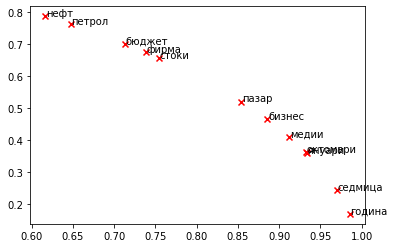

In [8]:
#U = np.load('w2v-U')
#V = np.load('w2v-V')

E = np.concatenate([U,V],axis=1)

E_reduced =utils.SVD_k_dim(E,k=2)
E_normalized_2d = E_reduced /np.linalg.norm(E_reduced, axis=1)[:, np.newaxis]

sampleWords = 'януари октомври седмица година медии пазар стоки бизнес фирма бюджет петрол нефт'.split()

utils.plot_embeddings(E_normalized_2d, word2ind, sampleWords, 'embeddings')